In [63]:
import pandas as pd
import sqlite3

## connection to the database

In [64]:
con = sqlite3.connect("../data/checking-logs.sqlite")

 ##  datetime from the pageviews table

In [65]:
df = pd.io.sql.read_sql(sql="SELECT datetime FROM pageviews WHERE uid LIKE 'user_%'", 
parse_dates=['datetime'],
con=con)

##  a new dataframe where the visits are counted and grouped by date

<AxesSubplot: title={'center': 'Views per day'}, xlabel='date'>

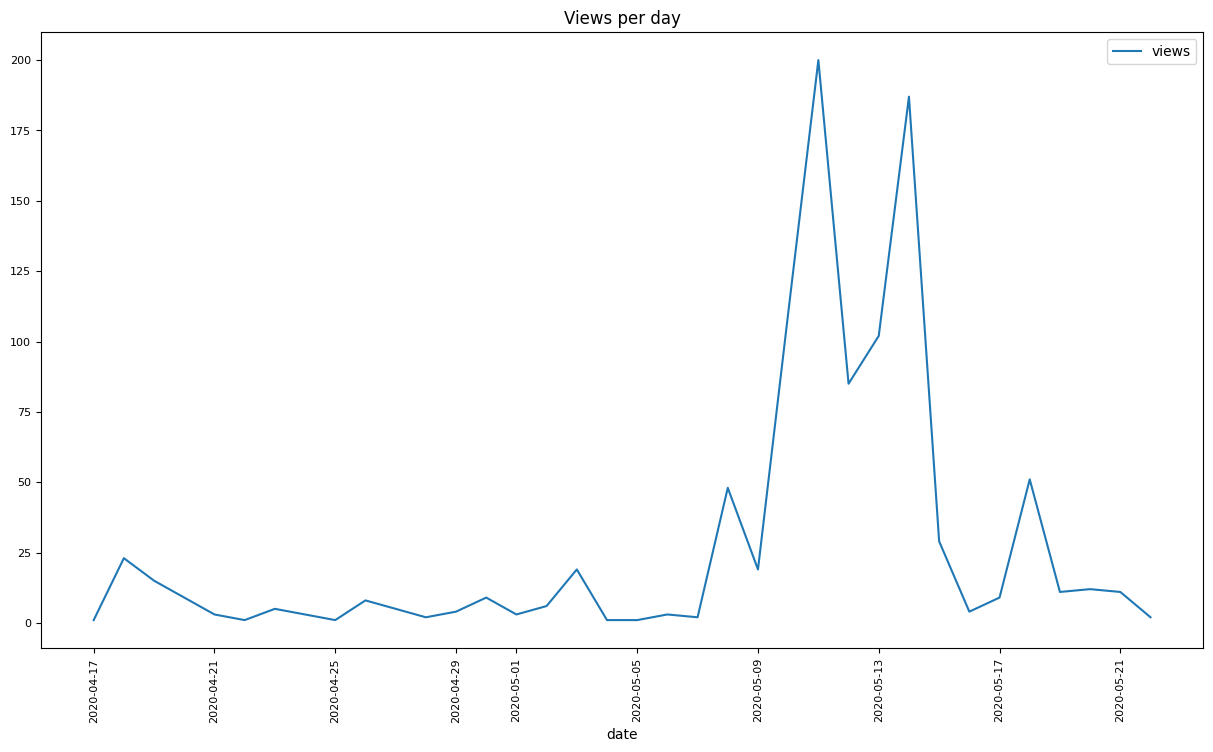

In [66]:
df = df.groupby([df['datetime'].dt.date]).count()
df.columns = ["views"]
df.index.name = 'date'
df.plot(fontsize=8, figsize=(15,8), title='Views per day', rot=90)


## Close connection

In [67]:
con.close()